In [27]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering as Agg

In [28]:
customer_data = pd.read_csv('data_T7.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [29]:
intervals = [15,20,30,40,50,60,70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col , bins = intervals)
customer_data['Age Groups']

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [30]:
customer_data_oh =  pd.get_dummies(customer_data)
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


In [8]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Groups
0,1,Male,19,15,39,"(15, 20]"
1,2,Male,21,15,81,"(20, 30]"
2,3,Female,20,16,6,"(15, 20]"
3,4,Female,23,16,77,"(20, 30]"
4,5,Female,31,17,40,"(30, 40]"
...,...,...,...,...,...,...
195,196,Female,35,120,79,"(30, 40]"
196,197,Female,45,126,28,"(40, 50]"
197,198,Male,32,126,74,"(30, 40]"
198,199,Male,32,137,18,"(30, 40]"


In [31]:
customer_data = customer_data.drop('CustomerID',axis = 1)

In [8]:
customer_data

,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Groups
0,Male,19,15,39,"(15, 20]"
1,Male,21,15,81,"(20, 30]"
2,Female,20,16,6,"(15, 20]"
3,Female,23,16,77,"(20, 30]"
4,Female,31,17,40,"(30, 40]"
...,...,...,...,...,...
195,Female,35,120,79,"(30, 40]"
196,Female,45,126,28,"(40, 50]"
197,Male,32,126,74,"(30, 40]"
198,Male,32,137,18,"(30, 40]"


<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Count'>

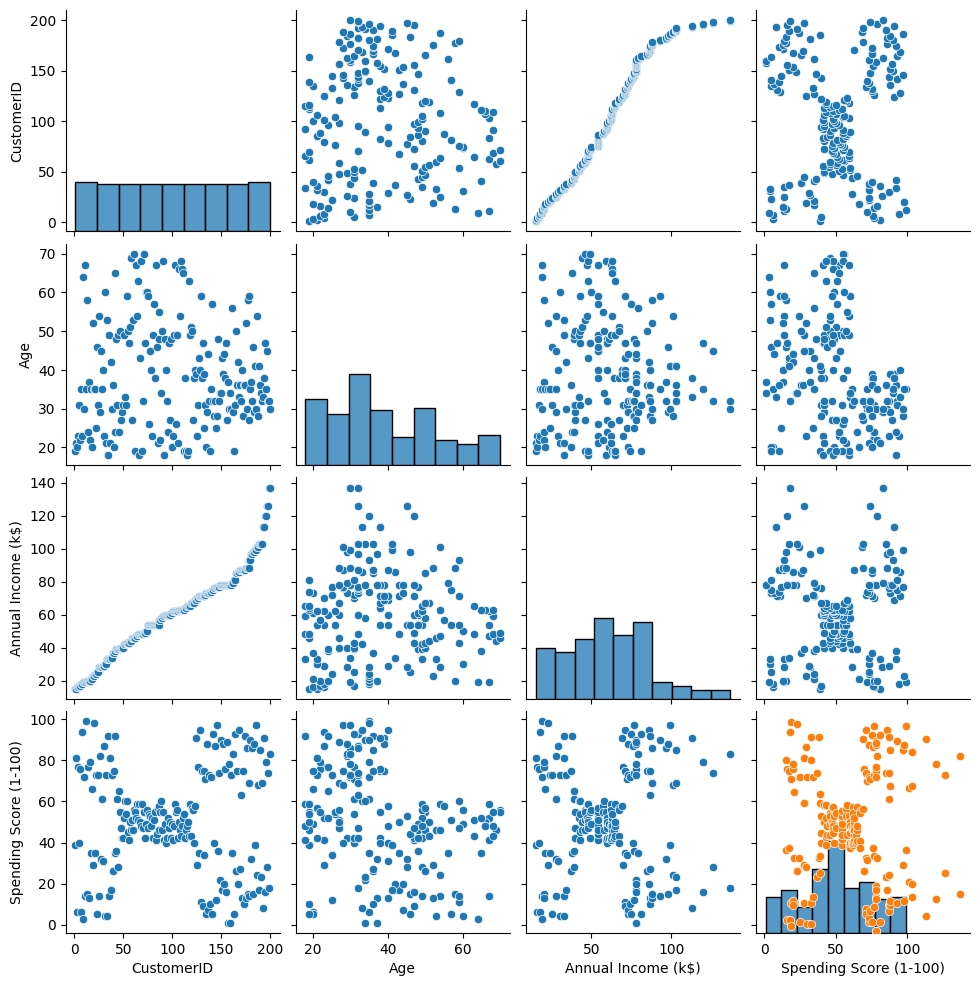

In [5]:
sns.pairplot(customer_data)
sns.scatterplot(x=customer_data['Annual Income (k$)'],
               y = customer_data['Spending Score (1-100)'])

In [32]:
customer_data_oh = customer_data_oh.drop(['Age'],axis=1)
customer_data_oh.shape

(200, 11)

In [36]:
selected_data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


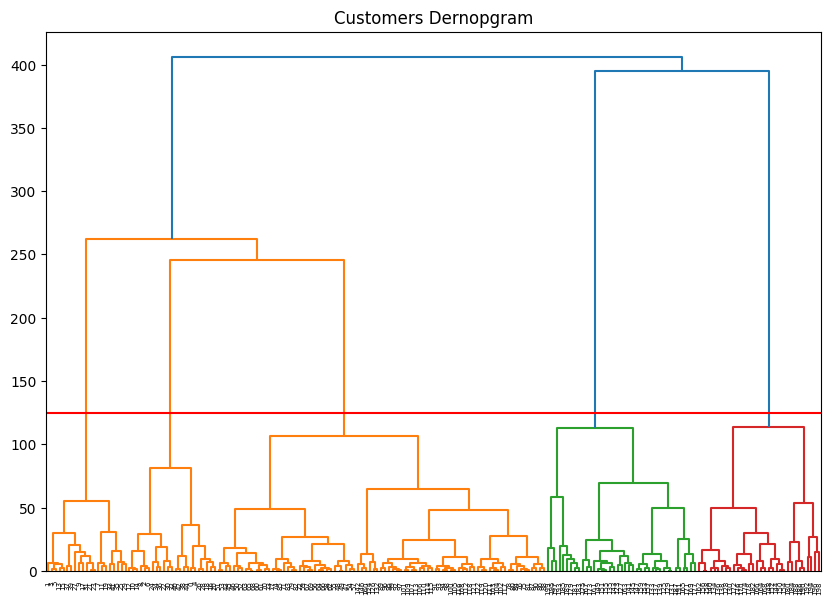

In [37]:
plt.figure(figsize = (10,7))
plt.title('Customers Dernopgram')
selected_data = customer_data_oh.iloc[:,1:3]
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y=125,color = 'r',linestyle='-')
plt.show()

In [11]:
clustering_model = Agg(n_clusters=5, affinity='euclidean')
clustering_model.fit(selected_data)

C:\Users\DHPC\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [12]:
clustering_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

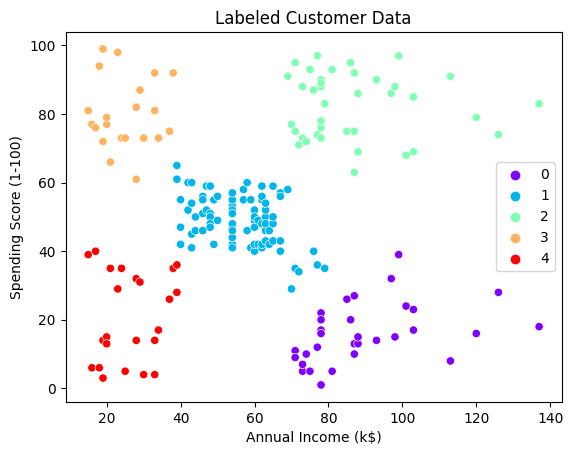

In [147]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',
               y='Spending Score (1-100)',
                data=selected_data,
               hue=data_labels,
               palette='rainbow').set_title('Labeled Customer Data')
plt.show()

# Tự code

Sử dụng selected_data

In [1]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering as Agg
import math

data= pd.read_csv('data_T7.csv')
data=data.drop(['CustomerID','Genre','Age'],axis=1)
df=pd.DataFrame()
df['X']= data['Annual Income (k$)']
df['Y']=data['Spending Score (1-100)']
df1=df.values
df1=df1.tolist()

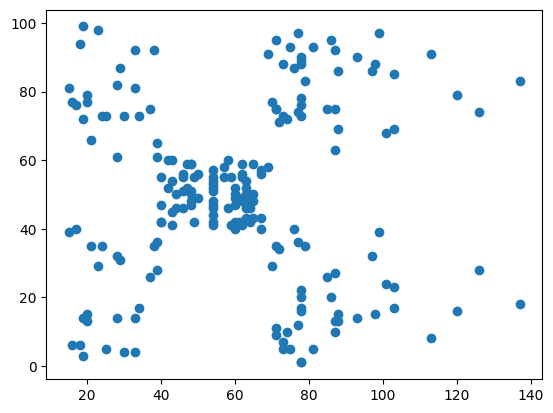

In [2]:
plt.scatter(x=df['X'], y=df['Y'])

In [3]:
import numpy as np
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
def matran(data):
    distances = euclidean_distances(data)
    return distances
def find(matrix):
    np.fill_diagonal(matrix, np.inf)
    min_distance = np.min(matrix)
    merged_point = np.unravel_index(np.argmin(matrix), matrix.shape)
    return min_distance, merged_point

def find_position(data, n):
    indices = np.argwhere(data == n)
    if len(indices) > 0:
        index = indices[0]
        return index
    else:
        return None

def upda(data, labels, cluster, clus):
    df = data.copy()
    matrix = matran(data)
    min_distance, merged_point = find(matrix)
    
    a = merged_point[0]
    b = merged_point[1]
    p = np.maximum(data[a], data[b])
    v,w = find_position(df, p)
    new_data = np.delete(df, v, axis=0)
    
    updated_points = (merged_point[0], merged_point[1])
    
    # Gán cluster cho nhãn
    if cluster.get(labels[a]) is None and cluster.get(labels[b]) is None:
        cluster[labels[a]] = labels[a]
        cluster[labels[b]] = labels[a]
    elif cluster.get(labels[a]) is None:
        cluster[labels[a]] = cluster[labels[b]]
    elif cluster.get(labels[b]) is None:
        cluster[labels[b]] = cluster[labels[a]]
    else:
        cluster_b = cluster[labels[b]]
        for key, value in cluster.items():
            if value == cluster_b:
                cluster[key] = cluster[labels[a]]
    
    clus.append(list(cluster.values()).copy())
    
    return matrix, updated_points, new_data, labels[labels != labels[v]], cluster, clus


In [41]:
data = df.head(200).values
labels = np.arange(1, len(data) + 1)
cluster = {label: label for label in labels}
clus = []

while len(data) >= 1:
    matrix, updated_points, data, labels, cluster, clus = upda(data, labels, cluster, clus)
    #print("New data:", data)
    #print("Labels:", labels)
    #print("Cluster:", [cluster[label] for label in labels])
    #print("---")

print("Final Clusters:")
for i, c in enumerate(clus):
    #if len(np.unique(c)) == 100:
    print(f"Step {i+1}: {c}")

Final Clusters:
Step 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
Step 2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,